# NAME - Akshay Khanna
# ROLL NO. - 102103415
# GROUP - 3Co15


In [49]:
#!pip install pycaret
from pycaret.datasets import get_data
from pycaret.clustering import *
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# WE TAKE THE DATASET IRIS FOR THIS ASSIGNMENT


In [50]:
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
data = data.drop(columns=['species'])

In [52]:
clustering_setup = setup(data)

,Description,Value
0,Session id,2339
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [53]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
preprocessing_techniques = {
    'None': None,
    'Normalisation': StandardScaler(),
    'PCA': PCA(),
    'Transform': None,
    'Scale': MinMaxScaler()
}

In [54]:
num_clusters = [3, 4, 5]

In [55]:
clustering_algorithms = ['kmeans', 'hclust', 'dbscan', 'meanshift', 'ap', 'sc', 'optics']

In [56]:
results_dict = {}

In [58]:
for algorithm in clustering_algorithms:
    algorithm_results = pd.DataFrame(index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
    for technique, preprocess_method in preprocessing_techniques.items():

        if preprocess_method is not None:
            preprocessed_data = preprocess_method.fit_transform(data)
        else:
            preprocessed_data = data


        model = create_model(algorithm)


        model.fit(preprocessed_data)


        if algorithm in ['hclust', 'dbscan', 'meanshift', 'ap', 'sc', 'optics']:
            labels = model.labels_
        else:
            labels = model.predict(preprocessed_data)


        if len(set(labels)) <= 1:
            continue


        silhouette = silhouette_score(preprocessed_data, labels)
        calinski_harabasz = calinski_harabasz_score(preprocessed_data, labels)
        davies_bouldin = davies_bouldin_score(preprocessed_data, labels)


        col_name = f'{technique}_c='
        for n in num_clusters:
            col_name_n = col_name + str(n)
            algorithm_results[col_name_n] = [silhouette, calinski_harabasz, davies_bouldin]


    results_dict[algorithm] = algorithm_results

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4972,529.1207,0.7760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4972,529.1207,0.7760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4972,529.1207,0.7760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4972,529.1207,0.7760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4972,529.1207,0.7760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4887,513.7721,0.7956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4858,219.8703,7.2228,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6855,508.8825,0.3893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3516,445.0811,0.9806,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4914,466.6312,0.6582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1375,16.5300,2.3550,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [59]:
for algorithm, results in results_dict.items():
    results.to_csv(f'{algorithm}_results.csv')

In [60]:
hclust_result=pd.read_csv('/content/hclust_results.csv')

In [61]:
hclust_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,Normalisation_c=3,Normalisation_c=4,Normalisation_c=5,PCA_c=3,PCA_c=4,PCA_c=5,Transform_c=3,Transform_c=4,Transform_c=5,Scale_c=3,Scale_c=4,Scale_c=5
0,Silhouette,0.488740,0.488740,0.488740,0.399326,0.399326,0.399326,0.488740,0.488740,0.488740,0.488740,0.488740,0.488740,0.432557,0.432557,0.432557
1,Calinski-Harabasz,513.772164,513.772164,513.772164,198.730315,198.730315,198.730315,513.772164,513.772164,513.772164,513.772164,513.772164,513.772164,299.899189,299.899189,299.899189
2,Davies-Bouldin,0.795602,0.795602,0.795602,0.981081,0.981081,0.981081,0.795602,0.795602,0.795602,0.795602,0.795602,0.795602,0.849343,0.849343,0.849343


In [62]:
dbscan_result=pd.read_csv('/content/dbscan_results.csv')

In [63]:
dbscan_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,Normalisation_c=3,Normalisation_c=4,Normalisation_c=5,PCA_c=3,PCA_c=4,PCA_c=5,Transform_c=3,Transform_c=4,Transform_c=5
0,Silhouette,0.485842,0.485842,0.485842,0.349198,0.349198,0.349198,0.485842,0.485842,0.485842,0.485842,0.485842,0.485842
1,Calinski-Harabasz,219.870227,219.870227,219.870227,76.975884,76.975884,76.975884,219.870227,219.870227,219.870227,219.870227,219.870227,219.870227
2,Davies-Bouldin,7.222827,7.222827,7.222827,6.160798,6.160798,6.160798,7.222827,7.222827,7.222827,7.222827,7.222827,7.222827


In [64]:
kmeans_result=pd.read_csv('/content/kmeans_results.csv')

In [ ]:
kmeans_result

In [66]:
meanshift_result=pd.read_csv('/content/meanshift_results.csv')

In [67]:
meanshift_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,Normalisation_c=3,Normalisation_c=4,Normalisation_c=5,PCA_c=3,PCA_c=4,PCA_c=5,Transform_c=3,Transform_c=4,Transform_c=5,Scale_c=3,Scale_c=4,Scale_c=5
0,Silhouette,0.685482,0.685482,0.685482,0.580184,0.580184,0.580184,0.685482,0.685482,0.685482,0.685482,0.685482,0.685482,0.629468,0.629468,0.629468
1,Calinski-Harabasz,508.882183,508.882183,508.882183,248.903428,248.903428,248.903428,508.882183,508.882183,508.882183,508.882183,508.882183,508.882183,353.367403,353.367403,353.367403
2,Davies-Bouldin,0.389291,0.389291,0.389291,0.597555,0.597555,0.597555,0.389291,0.389291,0.389291,0.389291,0.389291,0.389291,0.487705,0.487705,0.487705


In [68]:
ap_result=pd.read_csv('/content/meanshift_results.csv')

In [69]:
ap_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,Normalisation_c=3,Normalisation_c=4,Normalisation_c=5,PCA_c=3,PCA_c=4,PCA_c=5,Transform_c=3,Transform_c=4,Transform_c=5,Scale_c=3,Scale_c=4,Scale_c=5
0,Silhouette,0.685482,0.685482,0.685482,0.580184,0.580184,0.580184,0.685482,0.685482,0.685482,0.685482,0.685482,0.685482,0.629468,0.629468,0.629468
1,Calinski-Harabasz,508.882183,508.882183,508.882183,248.903428,248.903428,248.903428,508.882183,508.882183,508.882183,508.882183,508.882183,508.882183,353.367403,353.367403,353.367403
2,Davies-Bouldin,0.389291,0.389291,0.389291,0.597555,0.597555,0.597555,0.389291,0.389291,0.389291,0.389291,0.389291,0.389291,0.487705,0.487705,0.487705


In [70]:
sc_result=pd.read_csv('/content/sc_results.csv')

In [71]:
sc_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,Normalisation_c=3,Normalisation_c=4,Normalisation_c=5,PCA_c=3,PCA_c=4,PCA_c=5,Transform_c=3,Transform_c=4,Transform_c=5,Scale_c=3,Scale_c=4,Scale_c=5
0,Silhouette,0.491423,0.491423,0.491423,0.417008,0.417008,0.417008,0.491423,0.491423,0.491423,0.491423,0.491423,0.491423,0.398204,0.398204,0.398204
1,Calinski-Harabasz,466.630887,466.630887,466.630887,114.657936,114.657936,114.657936,466.630887,466.630887,466.630887,466.630887,466.630887,466.630887,268.701396,268.701396,268.701396
2,Davies-Bouldin,0.658227,0.658227,0.658227,0.586525,0.586525,0.586525,0.658227,0.658227,0.658227,0.658227,0.658227,0.658227,0.855919,0.855919,0.855919


In [72]:
optics_result=pd.read_csv('/content/optics_results.csv')

In [73]:
optics_result

,Unnamed: 0,None_c=3,None_c=4,None_c=5,Normalisation_c=3,Normalisation_c=4,Normalisation_c=5,PCA_c=3,PCA_c=4,PCA_c=5,Transform_c=3,Transform_c=4,Transform_c=5,Scale_c=3,Scale_c=4,Scale_c=5
0,Silhouette,-0.098701,-0.098701,-0.098701,-0.300675,-0.300675,-0.300675,-0.098701,-0.098701,-0.098701,-0.098701,-0.098701,-0.098701,-0.219735,-0.219735,-0.219735
1,Calinski-Harabasz,23.004159,23.004159,23.004159,8.539353,8.539353,8.539353,23.004159,23.004159,23.004159,23.004159,23.004159,23.004159,16.398008,16.398008,16.398008
2,Davies-Bouldin,2.145694,2.145694,2.145694,2.503841,2.503841,2.503841,2.145694,2.145694,2.145694,2.145694,2.145694,2.145694,3.181224,3.181224,3.181224


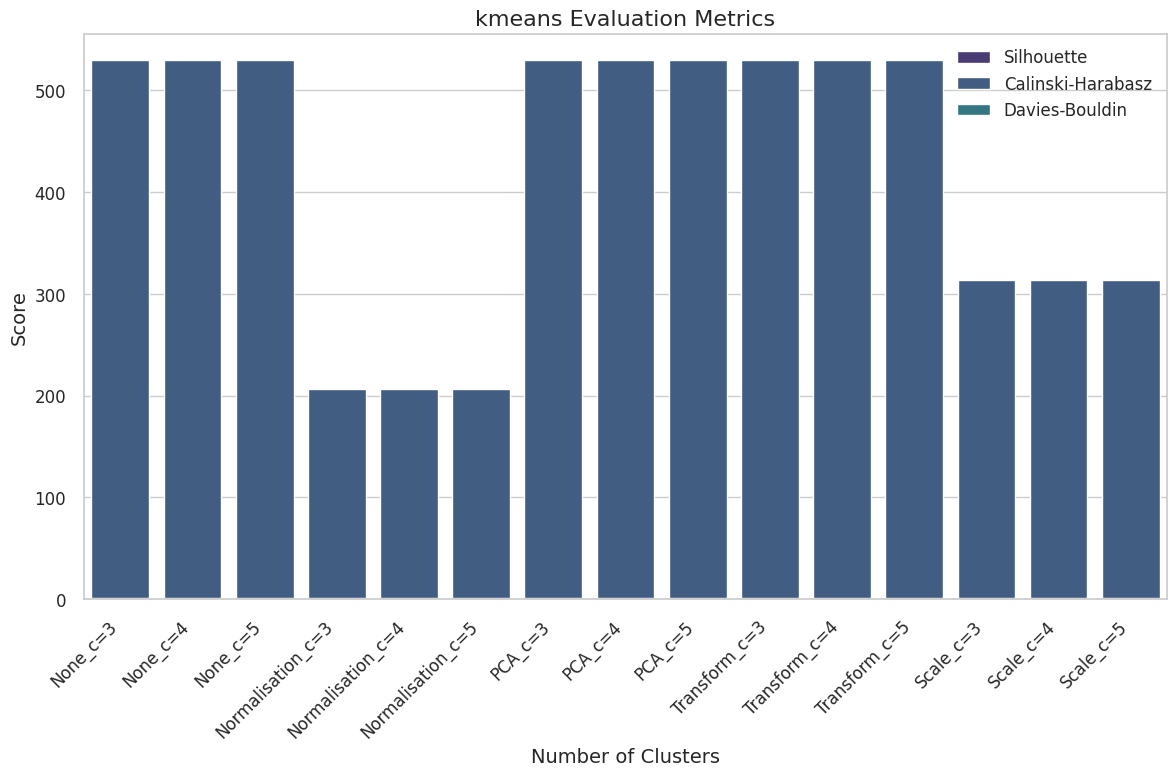

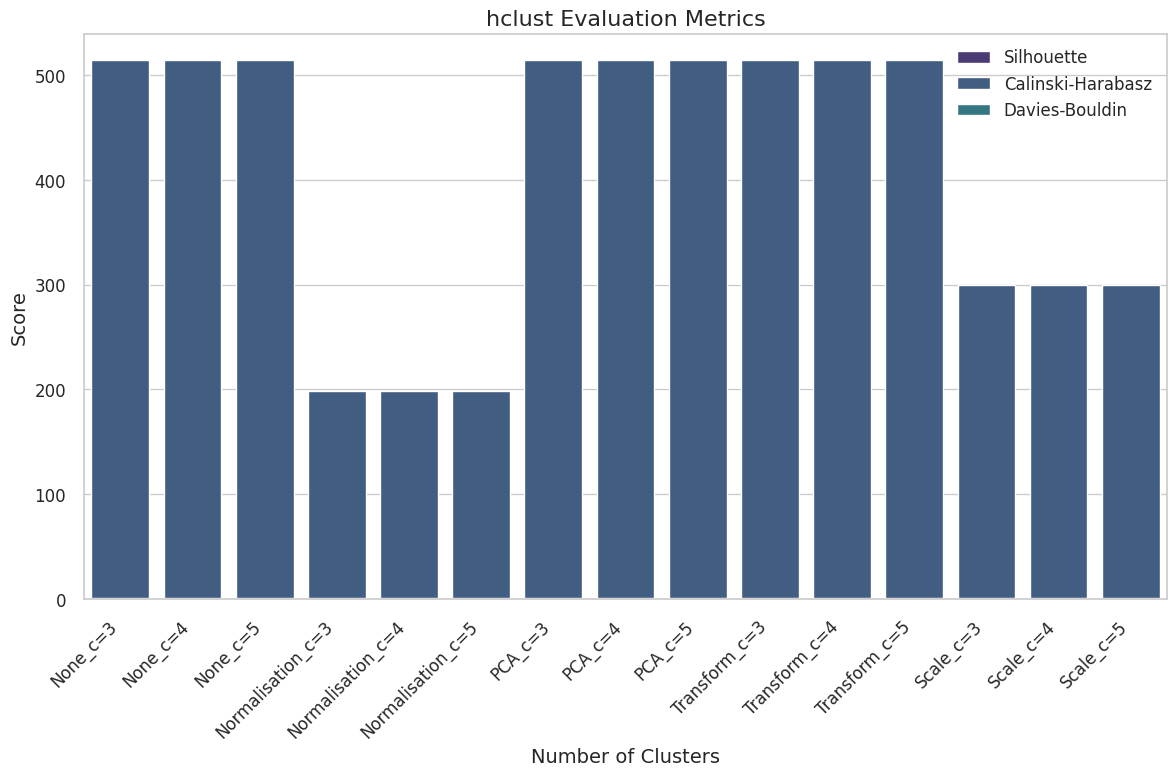

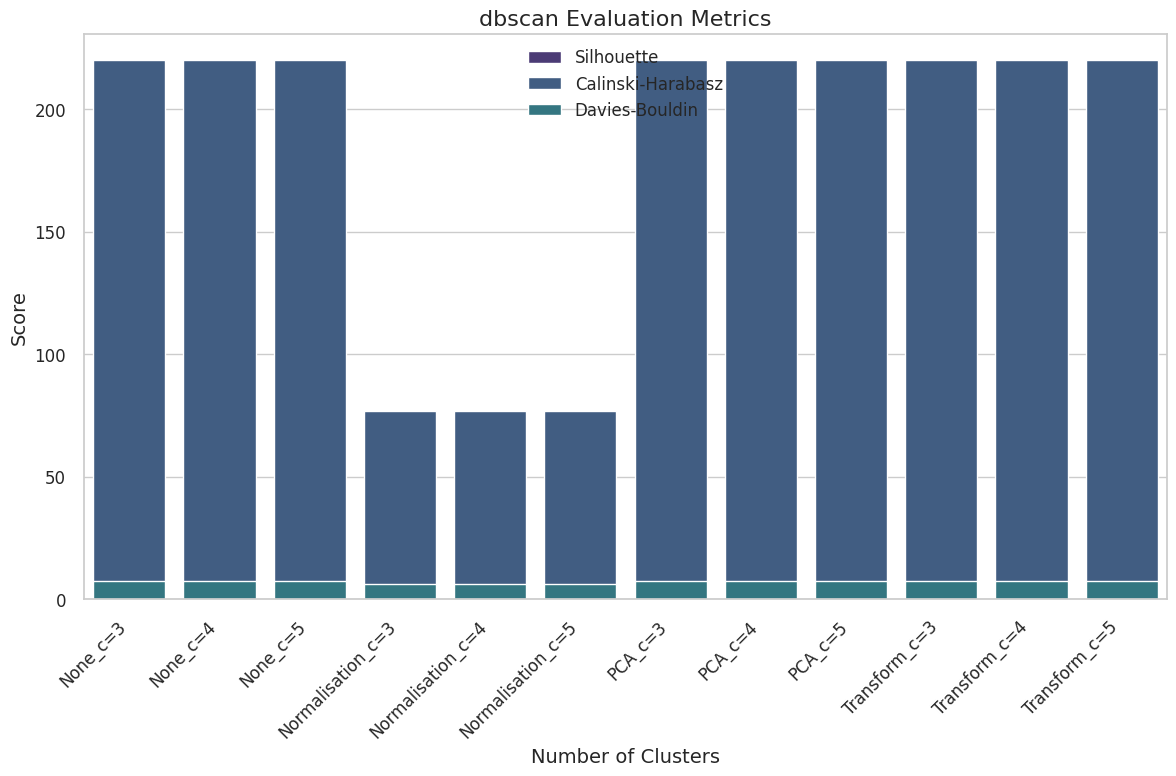

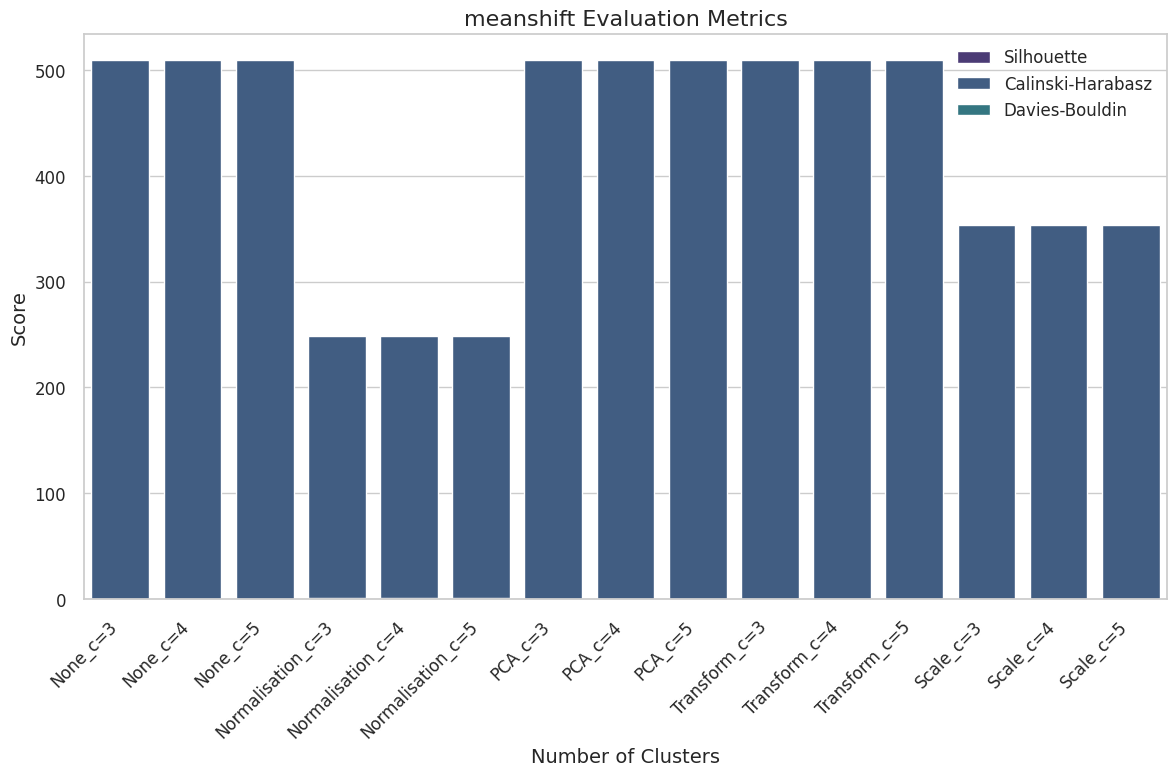

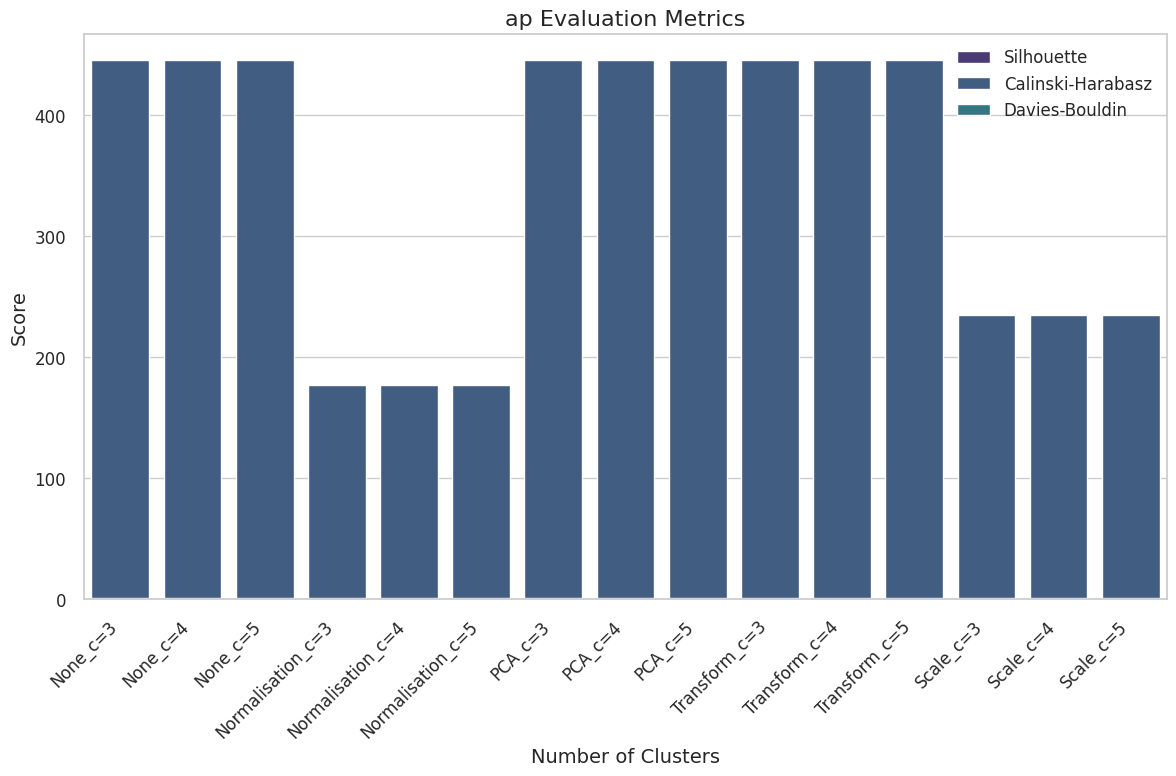

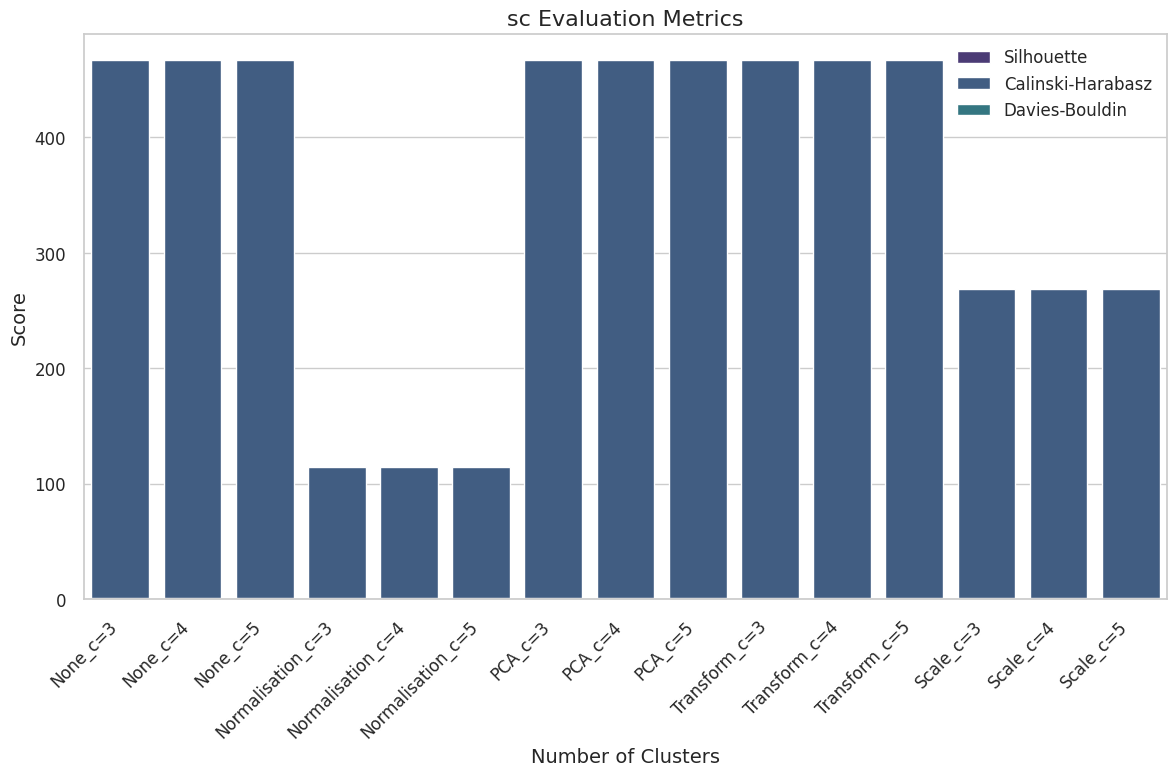

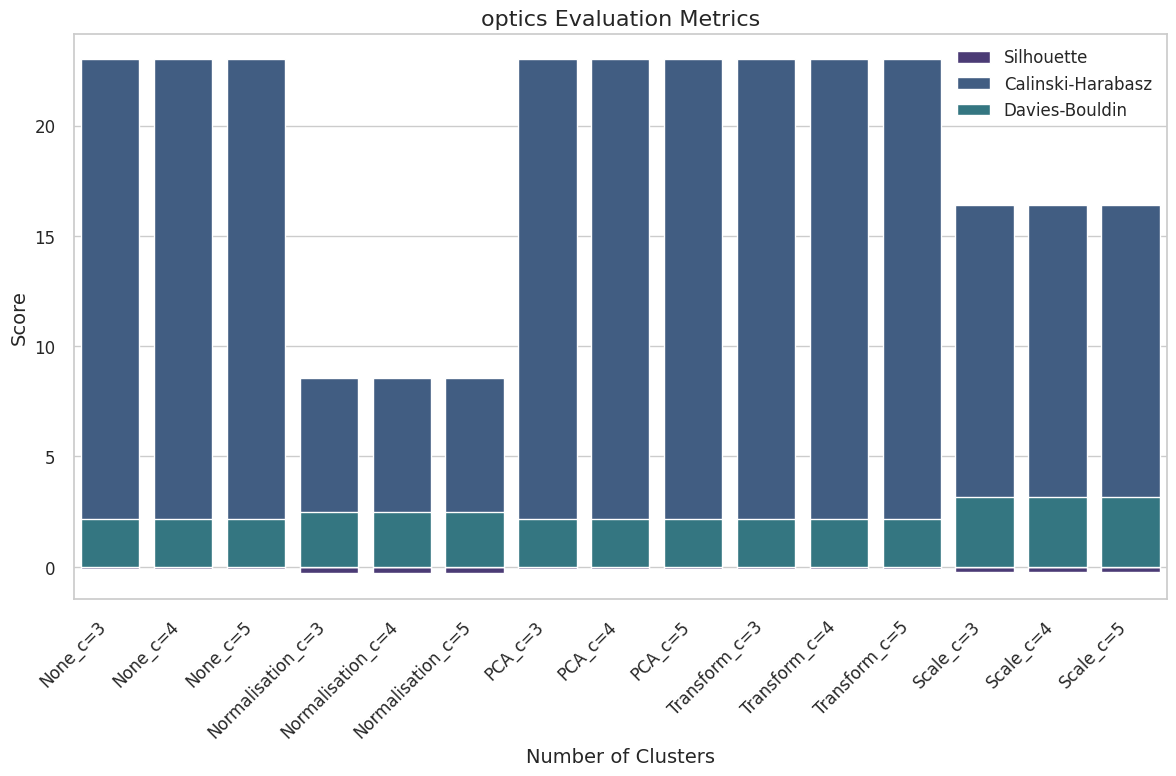

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("viridis")

evaluation_metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

for algorithm, results in results_dict.items():

    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.2)

    plt.figure(figsize=(12, 8))

    plt.title(f'{algorithm} Evaluation Metrics', fontsize=16)

    for metric in evaluation_metrics:
        sns.barplot(x=results.columns, y=results.loc[metric], label=metric)

    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)

    plt.legend(fontsize=12)
    plt.tight_layout()

    plt.show()
